In [30]:
import networkx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
go_terms = pd.read_csv('iPAGEv1.0/PAGE_DATA/ANNOTATIONS/human_c5_gs/c5.all.v7.4.symbols.gmt', sep='\t', header=None,
                      names=range(2000))

/tmp/ipykernel_2614752/1862159554.py:1: DtypeWarning: Columns (1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,12

In [54]:
go_terms.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,HP_MULTICYSTIC_KIDNEY_DYSPLASIA,http://www.gsea-msigdb.org/gsea/msigdb/cards/H...,CHRM3,RPGRIP1L,PEX11B,BUB1B,HNF1B,CC2D2A,ARL6,WDPCP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HP_RECURRENT_URINARY_TRACT_INFECTIONS,http://www.gsea-msigdb.org/gsea/msigdb/cards/H...,CHRM3,CIITA,CLIP2,HSPA9,NBN,CISD2,ATP7A,HPSE2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HP_NEUROGENIC_BLADDER,http://www.gsea-msigdb.org/gsea/msigdb/cards/H...,GJA1,WFS1,ATXN3,TBCD,ACER3,PEX3,PLP1,ERCC6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HP_URINARY_URGENCY,http://www.gsea-msigdb.org/gsea/msigdb/cards/H...,SPG11,UBAP1,ATXN10,PINK1,SPG7,ATL1,TRPV4,CACNA1G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HP_HYPOPLASIA_OF_THE_UTERUS,http://www.gsea-msigdb.org/gsea/msigdb/cards/H...,SOHLH1,IRF6,B3GLCT,HCCS,SPRY4,NIN,FOXL2,HS6ST1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
go_terms=go_terms.dropna(axis=1,how='all')

In [56]:
go_terms = go_terms.loc[:,[0] + list(range(2,1984))]

In [57]:
go_terms.index = go_terms[0]

In [58]:
go_terms = go_terms.loc[:,range(2,1984)]

In [59]:
go_terms.head()

,2,3,4,5,6,7,8,9,10,11,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983
0,,,,,,,,,,,,,,,,,,,,,
HP_MULTICYSTIC_KIDNEY_DYSPLASIA,CHRM3,RPGRIP1L,PEX11B,BUB1B,HNF1B,CC2D2A,ARL6,WDPCP,PEX12,LZTFL1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP_RECURRENT_URINARY_TRACT_INFECTIONS,CHRM3,CIITA,CLIP2,HSPA9,NBN,CISD2,ATP7A,HPSE2,HOXA13,LAMB3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP_NEUROGENIC_BLADDER,GJA1,WFS1,ATXN3,TBCD,ACER3,PEX3,PLP1,ERCC6,ERCC8,SNCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP_URINARY_URGENCY,SPG11,UBAP1,ATXN10,PINK1,SPG7,ATL1,TRPV4,CACNA1G,TBP,LMNB1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP_HYPOPLASIA_OF_THE_UTERUS,SOHLH1,IRF6,B3GLCT,HCCS,SPRY4,NIN,FOXL2,HS6ST1,GNRH1,BMP15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
data1 = pd.read_csv('gene_test2.txt_human_c5_gs_PAGE/pvmatrix.txt', sep='\t')

In [164]:
data1_terms = data1['GO'].apply(lambda x: x.split(' ')[0])

In [165]:
go_terms_test = go_terms.loc[data1_terms,:]

In [195]:
import networkx as nx
G = nx.Graph()

In [196]:
for x in go_terms_test.index:
    for y in go_terms_test.index:
        if x == y:
            continue
        
        geneset1 = [i for i in go_terms_test.loc[x, :] if str(x) != 'nan']
        geneset2 = [i for i in go_terms_test.loc[y, :] if str(x) != 'nan']
    
        intersect = len(list(set(geneset1).intersection(geneset2)))
        union = len(list(set(geneset1).union(geneset2)))

        if intersect/union >= 0.017:
            G.add_edge(x, y, weight=intersect/union)

In [225]:
pos = nx.random_layout(G)

In [211]:
colors = ['yellow', 'yellow', 'yellow', 'green', 'green', 'yellow', 'yellow', 'green', 'yellow']

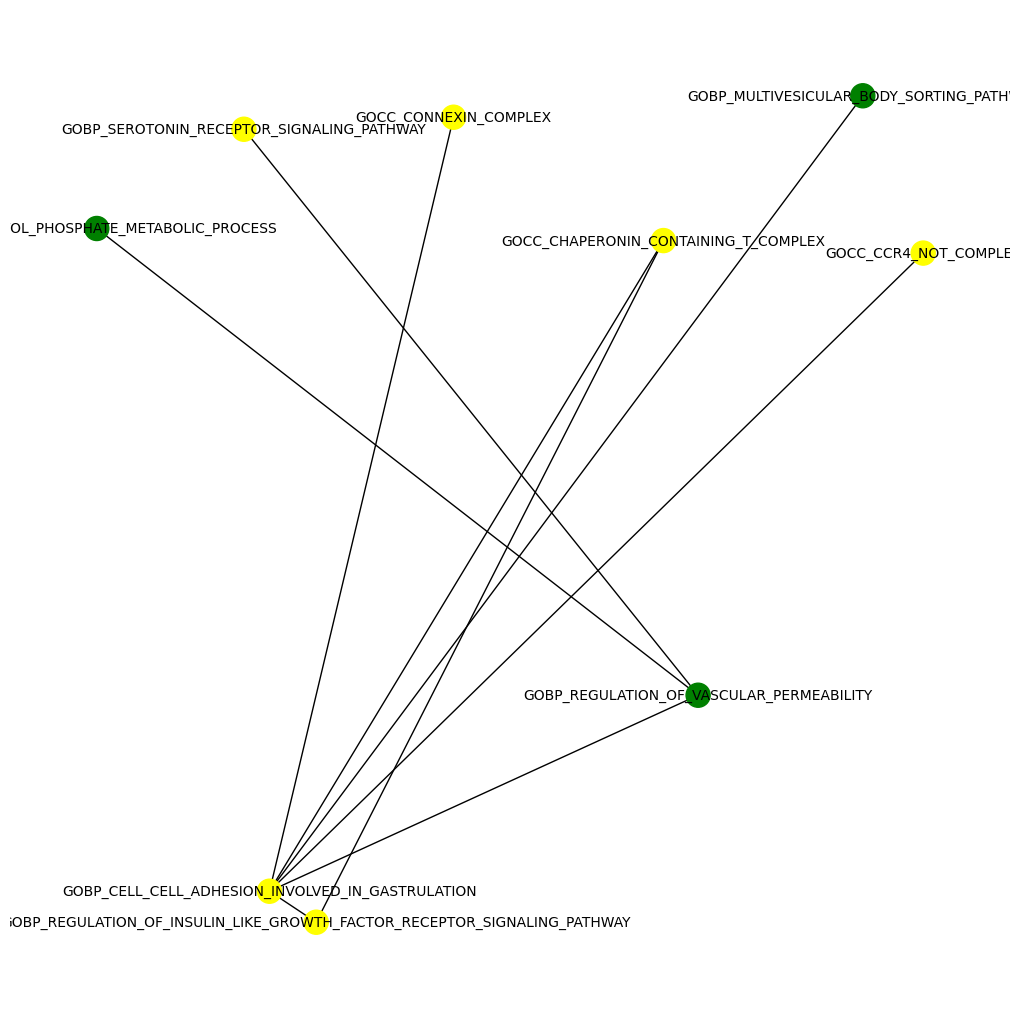

In [227]:
plt.figure(4,figsize=(10,10)) 
nx.draw(G, pos, font_size=8, node_color = colors)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()